# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [ ]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [ ]:
df_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [2]:
bearer_token = ''
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query the Twitter API and get information for each tweet ID
new_line = ''
tweet_errors = {}
count = 0

"""iterate over each tweet ID and get JSON data for each tweet ID
then save then append each tweet JSON data into the new_line variable"""
for tweet_id in df_tweets.tweet_id:
    try:
        count = count + 1
        # get tweet status by ID
        tweet = api.get_status(tweet_id, tweet_mode='extended')

        # append tweet status JSON into new_line
        new_line = new_line + "{}\n".format(json.dumps(tweet._json))
    except (tweepy.errors.NotFound, tweepy.errors.Forbidden) as e:
        # some tweet may have been deleted or access restricted 
        tweet_errors[tweet_id] = e
        continue

# write the new_line value into a file tweet_json.txt
save_to_file(content=new_line, filename='tweet_json.txt')
print(count, 'tweets data saved')
print(tweet_errors)

In [ ]:
def save_to_file(content, filename, mode='w'):
    #write content into a file
    with open(filename, mode) as a_file:
        a_file.write(content)

In [ ]:
df_tweet_json = pd.read_json('tweet_json.txt', lines=True)
df_tweet_count = df_tweet_json[['id', 'retweet_count', 'favorite_count', 'created_at']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

##### Twitter Enhanced Dataset

In [ ]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Observation**:

1. The above columns `doggo`, `floofer`,`pupper` and `puppo` are supposed to be values for dog stages rather as column names, so it is best we put them in a single column rather than as column names.

2. The `rating_numerator` contains values greater than the denominator; while this was mentioned in the project details about WeRateDog wierd ratings, we may perform further programatic assessment to check for extreme cases e.g 0 / 10, or even 100/10.

In [ ]:
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**Observation**: 

1. The `name` column has some rows with value None, which may further be programatically accessed.
2. The html codes in the `source` column are not neccesary.

##### Prediction dataset

In [ ]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Observation**: None for now.

In [ ]:
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**Oberservation**:

1. I feel all `p1_conf`, `p2_conf`, and `p3_conf` values may need to be rounded to 6 decimal places to make the display consistent; since this won't affect the image predictions. 
2. They are also not descriptive enough and may need to be renamed e.g p1_confidence.
3. Some of the dog names in `p1`, `p2`, and `p3` contains underscore. I think they are not neccesary as names in general usually don't have underscore.

##### Like & Retweet dataset

In [ ]:
df_tweet_count.head()

,id,retweet_count,favorite_count,created_at
0,892420643555336193,6968,33668,2017-08-01 16:23:56+00:00
1,892177421306343426,5272,29205,2017-08-01 00:17:27+00:00
2,891815181378084864,3464,21962,2017-07-31 00:18:03+00:00
3,891689557279858688,7190,36772,2017-07-30 15:58:51+00:00
4,891327558926688256,7712,35134,2017-07-29 16:00:24+00:00


**Observation**: The tweet ID column here is title `id` which is not consistent with the two other dataframes `df_enhanced` and `df_predictions` (both have `tweet_id` as tweet ID column).

In [ ]:
df_tweet_count.tail()

,id,retweet_count,favorite_count,created_at
2322,666049248165822465,36,88,2015-11-16 00:24:50+00:00
2323,666044226329800704,115,245,2015-11-16 00:04:52+00:00
2324,666033412701032449,36,100,2015-11-15 23:21:54+00:00
2325,666029285002620928,39,112,2015-11-15 23:05:30+00:00
2326,666020888022790149,419,2282,2015-11-15 22:32:08+00:00


### Programmatic assessment

##### Twitter Enhanced Dataset

In [ ]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Observation**: 

1. the following columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `expanded_urls` all have missing values. But since we don't need retweets as stated in the instructions, then we may not consider the missing values for all retweets columns (probably drop all).
2. the `timestamp` column has a datatype of *object* but having the datatype as *datetime* is appropriate.
3. No missing values. `tweet_id` column datatype may need to be converted from *integer* to *string*; since it values does not represent money, measurements or any sort of preference.

In [ ]:
# get missing values for expanded_urls
check_expanded_url = df_enhanced[df_enhanced['expanded_urls'].isnull()]
# check to see if the tweet text has a link
check_expanded_url['text'].str.contains('https').sum()

0

**why the above?** since we noticed several missing values for `expanded_urls` then we need to check if they are a problem. If a tweet `text` contains a link but there is no link in the `expanded_urls` then that's a problem with the scrapping.

However, every tweet containing a link has an expanded_urls. Cool!

In [ ]:
# count tweets unique rating_numerators
df_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

Looking at the unique value count of `rating_numerator`, it makes sense to me not to have `rating_numerators` with values 0 or values higher than 14 (ie x > 0 && x < 15).

In [ ]:
# count tweets unique rating_denominator (just to be sure)
df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

Aha! I'm not comfortable having `rating_denominator` not equal to 10 considering over 99% of the values is 10.

In [ ]:
# count dog unique names (just to be sure)
df_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Obie         1
Mya          1
Apollo       1
Joshwa       1
Ace          1
Name: name, Length: 957, dtype: int64

745 rows in the `name` column encoded as None meaning dog has no name. This is misleading as the pandas method `info()` indicate no missing value for this column above.

PS: About 62 rows may be retweets and not actual dog rating tweets as discovered below.

In [ ]:
# get name with None values
check_name = df_enhanced[df_enhanced['name'] == 'None']
# check to see the tweet text that has a link as those without are usually retweet
check_name['text'].str.contains('https').sum()

683

In [ ]:
# checking for duplicated IDs or text
df_enhanced[df_enhanced.duplicated(['tweet_id', 'text'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


no duplicate rows for IDs or text

#### Prediction dataset

In [ ]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Observation**: No missing values. `tweet_id` column datatype may need to be converted from *integer* to *string*; since it values does not represent money, measurements or any sort of preference.

In [ ]:
# checking for duplicated IDs or and jpg_url
df_predictions[df_predictions.duplicated(['tweet_id', 'jpg_url'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


No duplicated IDs or jpg urls

In [ ]:
df_tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              2327 non-null   int64              
 1   retweet_count   2327 non-null   int64              
 2   favorite_count  2327 non-null   int64              
 3   created_at      2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 72.8 KB


**Observation**: No missing values. tweet_id column datatype may need to be converted from integer to string; since it values does not represent money, measurements or any sort of preference.

In [ ]:
# check to see if any data beyond 2nd of August 2017 exist
df_tweet_count[df_tweet_count['created_at'] >= '2017-08-02'].shape

(0, 4)

**Why check for this?** as stated in the project instructions, no prediction algorithm was applied for dataset beyond 02 August 2017.

none is in the dataset.

### Quality issues
1. The `source` column in the enhanced dataset has unnecesary HTML code

2. The `name` column in the enhanced dataset have several missing name represented as None.

3. `p1_conf`, `p2_conf`, and `p3_conf` in `df_predictions` are not descriptive enough and should be renamed.

4. The `timestamp` in the enhanced dataset is not in datetime format.

5. `id` in `df_tweet_count` should be renamed to `tweet_id`

6. The `tweet_id` (id in df_tweet_count) column in the three datasets are stored as int values and should be strings.

7. There are some tweets that are retweets or replies and we don't need them.

8. Remove `rating_denominator` values not equal to 10 as they are wrong and mostly extreme values e.g  a single instance of 0
 

### Tidiness issues
1. `doggo`, `floofer`, `pupper`, `puppo` in `df_enhanced` should be values in a single column rather than distinct column names.

2. `df_tweet_count` shouldn't be alone but should be merged with `df_enhanced`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data
df_enhanced_copy = df_enhanced.copy()
df_predictions_copy = df_predictions.copy()
df_tweet_count_copy = df_tweet_count.copy()

### 1. The `source` column in the enhanced dataset has unnecesary HTML code

#### Define:
Remove all HTML code from the `source` column in the `df_enhanced_copy` dataframe leaving just the source name.

#### Code

In [ ]:
clean_source = df_enhanced_copy.source.str.extract('>(.*?)<')
df_enhanced_copy.source = clean_source

#### Test

In [ ]:
df_enhanced_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 2. The `name` column in the enhanced dataset have several missing name represented as None.

#### Define
In the `name` column, find rows with string value None and replace with NaN 

#### Code

In [ ]:
df_enhanced_copy.name = df_enhanced_copy.name.replace(to_replace='None', value=np.nan)

#### Test

In [ ]:
df_enhanced_copy[df_enhanced_copy.name == 'None'].shape[0]
#df_enhanced_copy.name.value_counts()

0

### 3. `p1_conf`, `p2_conf`, and `p3_conf` in `df_predictions` are not descriptive


#### Define
Rename the three columns `p1_conf`, `p2_conf`, and `p3_conf` in the `df_predictions_copy` dataframe with `p1_confidence`, `p2_confidence`, and `p3_confidence` respectively.

#### Code

In [ ]:
df_predictions_copy.rename(columns={'p1_conf': 'p1_confidence', 'p2_conf': 'p2_confidence', 'p3_conf': 'p3_confidence'}, inplace=True, errors='raise')

#### Test

In [ ]:
df_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_confidence', 'p1_dog', 'p2',
       'p2_confidence', 'p2_dog', 'p3', 'p3_confidence', 'p3_dog'],
      dtype='object')

### 4. The `timestamp` in the enhanced dataset is not in datetime format.

#### Define
Change `timestamp` data format to datetime in the `df_enhanced_copy` dataframe

#### Code

In [ ]:
df_enhanced_copy.timestamp = pd.to_datetime(df_enhanced_copy.timestamp)

#### Test

In [ ]:
df_enhanced_copy.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### 5. `id` in `df_tweet_count` should be renamed to `tweet_id`

#### Define
Rename `id` column to `tweet_id` in the `df_tweet_count_copy` dataframe

#### Code

In [ ]:
df_tweet_count_copy.rename(columns={'id': 'tweet_id'}, inplace=True, errors='raise')

#### Test

In [ ]:
df_tweet_count_copy.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'created_at'], dtype='object')

### 6. The `tweet_id` (id in df_tweet_count) column in the three datasets are integer datatypes and should be strings.

#### Define
In the three dataframes(`df_enhanced_copy`, `df_predictions`, `df_tweet_count_copy`) change the `tweet_id` columns from `int` datatype to string datatype.

#### Code

In [ ]:
df_enhanced_copy.tweet_id = df_enhanced_copy.tweet_id.astype(str)
df_predictions_copy.tweet_id = df_predictions_copy.tweet_id.astype(str)
df_tweet_count_copy.tweet_id = df_tweet_count_copy.tweet_id.astype(str)

#### Test

In [ ]:
print(df_enhanced_copy.tweet_id.dtype)
print(df_predictions_copy.tweet_id.dtype)
print(df_tweet_count_copy.tweet_id.dtype)

object
object
object


### 7. There are some tweets that are retweets or replies and we don't need them.

#### 
Remove all tweets from `df_enhanced` that are retweets or replies. A retweet or reply is a tweet that has a row value in either `retweeted_status_id` or `in_reply_to_status_id ` respectively. We will then need to remove all `&_reply` and `retweet_*` columns.

#### Code

In [ ]:
# extract columns without rows values in `retweeted_status_id` or `in_reply_to_status_id`
df_enhanced_copy = df_enhanced_copy[
    (df_enhanced_copy.retweeted_status_id.isna() == True) 
    & (df_enhanced_copy.in_reply_to_status_id.isna() == True)]

df_enhanced_copy.drop(['in_reply_to_status_id',
                            'in_reply_to_user_id', 
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],
                            axis=1, inplace=True)

#### Test

In [ ]:
df_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### 8. Some tweets `rating_denominator` are incorrect and contain extreme values

#### Define
Replace rows from `rating_denominator` that the value is not 10 with 10 e.g  a single instance of 0.

#### Code

In [ ]:
df_enhanced_copy.loc[df_enhanced_copy.rating_denominator != 10, 'rating_denominator'] = 10

#### Test

In [ ]:
df_enhanced_copy.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Tidying:  `doggo`, `floofer`, `pupper`, `puppo` in `df_enhanced` should be values in a single column rather than distinct column names.

#### Define
Melt `doggo`, `floofer`, `pupper`, and `puppo` into a single column `dog_stage` and also remove rows with value 'None'.

#### Code

In [ ]:
def u(row):
    # stages = ['doggo', 'floofer', 'pupper', 'puppo']
    # unknown = True

    # for stage in stages:
    #     if row[stage] != 'None':
    #         unknown = False

    # if unknown == True:
    #     val = 'unknown'
    # else:
    #     val = 'None'

    # return val

    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'unknown'
    else:
        val ='None'
    return val

df_enhanced_copy['unknown'] = df_enhanced_copy.apply(u, axis=1)

df_enhanced_copy = pd.melt(df_enhanced_copy, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], value_vars=["doggo", "floofer", "pupper", "puppo", "unknown"], var_name="dog_stage", value_name="value")
df_enhanced_copy = df_enhanced_copy[df_enhanced_copy['value'] != 'None']
df_enhanced_copy = df_enhanced_copy.drop('value', axis=1)

#### Test

In [ ]:
df_enhanced_copy.dog_stage.value_counts()

unknown    1761
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Tidying: `df_tweet_count` shouldn't be alone but should be merged with `df_enhanced`

#### Define
Merge `df_enhanced_copy` and `df_tweet_count_copy` on tweet_id column. And drop `created_at` column.

In [ ]:
df_cleaned = pd.merge(df_enhanced_copy, df_tweet_count_copy, how='left', on='tweet_id')
df_cleaned.drop(['created_at'], axis=True, inplace=True)

#### Test

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   object             
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source              2108 non-null   object             
 3   text                2108 non-null   object             
 4   expanded_urls       2105 non-null   object             
 5   rating_numerator    2108 non-null   int64              
 6   rating_denominator  2108 non-null   int64              
 7   name                1499 non-null   object             
 8   dog_stage           2108 non-null   object             
 9   retweet_count       2100 non-null   float64            
 10  favorite_count      2100 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 197.6+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
df_twitter_master = df_cleaned.copy()
df_twitter_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

### Insights:
1. Are likes and retweeets correlated?

2. Which are the most common dog stage?

3. Which are the most common dog breed?

### Visualization

In [ ]:
correlations = df_twitter_master[ ['retweet_count', 'favorite_count'] ].corr()
correlations

,retweet_count,favorite_count
retweet_count,1.000000,0.926604
favorite_count,0.926604,1.000000


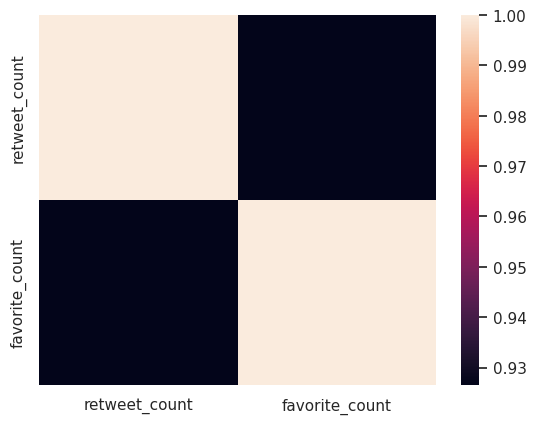

In [ ]:
sns.heatmap(correlations)
plt.show()

**Remark:** Likes and Retweets are highly posivitvely correlated.

<AxesSubplot:xlabel='count', ylabel='dog_stage'>

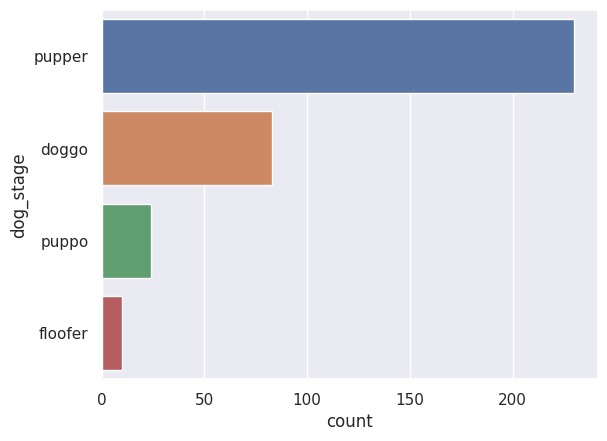

In [ ]:
df_stages = df_twitter_master[df_twitter_master.dog_stage != 'unknown']
df_stages_count = (
    df_stages.dog_stage
                    .value_counts()
                    .head()
                    .to_frame()
                    .reset_index()
                    .rename(columns={'index': 'dog_stage', 'dog_stage': 'count'})
)
# bar plot
sns.barplot(data=df_stages_count, x='count', y='dog_stage')

**Remark:** Most dog rated are in pupper stage.

<AxesSubplot:xlabel='average', ylabel='dog_stage'>

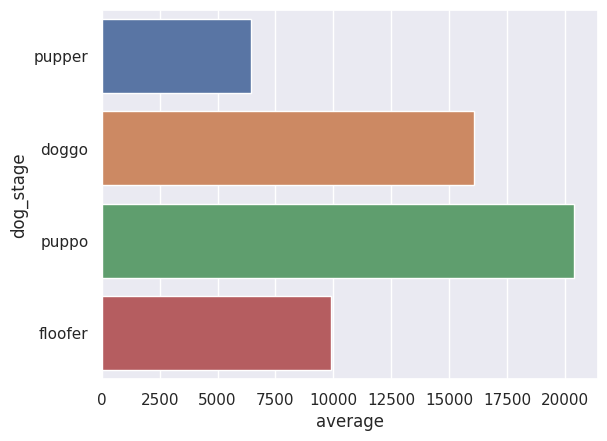

In [ ]:
# get the dog_stages that were recongnixed
# iterate the dog stages
# get average likes for each stage
# plot the stages in a bar plot
df_stages_likes = df_stages_count.rename(columns={'count': 'average'})
for index, row in df_stages_likes.iterrows():
    df_stage = df_stages[ df_stages['dog_stage'] ==  row.dog_stage ]
    df_stages_likes['average'][index] = df_stage['favorite_count'].mean()

# bar plot
sns.barplot(data=df_stages_likes, x='average', y='dog_stage')

**Remark:** Puppo is the most liked dog in terms of tweet counts.

PS: If we sum the total likes by using `sum()` instead of `.mean()`, then pupper stage is the most liked; and a reasons is because it recieved more ratings. However, to have fair weight, we considered each stage rate count. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3886c589-8536-4a5a-8bad-108d7f06e72c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>